# Notebook 1: MED-PC Extracting the Recording Data and Metadata

In [1]:
import sys
import glob
from collections import defaultdict
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from medpc2excel.medpc_read import medpc_read
sys.path.append('../../src')
import extract.dataframe
import processing.tone
import extract.metadata
plt.rcParams["figure.figsize"] = (10,6)

## Getting the Metadata from all the MED-PC Recording Files

In [2]:
# all_med_pc_file = glob.glob(r"C:\Users\alber\OneDrive\Documents\GitHub\MED-PC\FP_P2C2_Data\2024-08-30_08h22m_Subject p5.txt", recursive=True)

- The path of the directory that this notebook is in. This will be where relative paths will be based off of

- All the other files in this directory. If you want to use a folder in here such as the `data` folder, you'd type `./data/{name_of_folder}` where you replace `{name_of_folder}` with the name of the folder without the `{}`. You will do this in the cells following the one below
    - The `./` means the path will reference the current directory that the command is being used from

In [3]:

current_working_directory = r"C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data"
all_med_pc_file = os.listdir(current_working_directory)
all_med_pc_file = [os.path.join(current_working_directory, file) for file in all_med_pc_file]



In [4]:
all_med_pc_file[:10]

['C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_08h28m_Subject nn1.txt',
 'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_08h28m_Subject nn2.txt',
 'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_09h48m_Subject nn3.txt',
 'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_09h48m_Subject nn4.txt',
 'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_11h36m_Subject pp1.txt',
 'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_11h36m_Subject pp2.txt',
 'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_12h54m_Subject pp3.txt',

- Example of what the MED-PC Recording file looks like

In [5]:
with open(all_med_pc_file[0]) as f:
    lines = f.readlines()
    for line in lines[:20]:
        print(line)

File: C:\MED-PC\Data\2025-01-24_08h28m_Subject nn1.txt







Start Date: 01/24/25

End Date: 01/24/25

Subject: nn1

Experiment: FP_C3_RT_Day1

Group: NAc

Box: 3

Start Time: 08:28:46

End Time: 09:36:07

MSN: C57_reward_training

A:    4399.000

D:    9000.000

E:       0.000

L:       0.000

M:       0.000

O:       0.000

T:    3660.000



- We will be extracting the first 10 or so lines that look like:

```
File: C:\MED-PC\Data\2022-05-06_12h59m_Subject 3.4 (2).txt

Start Date: 05/06/22

End Date: 05/06/22

Subject: 3.4 (2)

Experiment: Pilot of Pilot

Group: Cage 4

Box: 1

Start Time: 12:59:58

End Time: 14:02:38

MSN: levelNP_CS_reward_laserepochON1st_noshock
```

- We will just find all the lines that start with `"File", "Start Date", "End Date", "Subject", "Experiment", "Group", "Box", "Start Time", "End Time", or "MSN"`. And get the metadata from those lines. And then stop once all the metadata types have been collected

In [6]:
# This makes a nested dictionary of file paths to each individual metadata type
file_path_to_meta = extract.metadata.get_all_med_pc_meta_data_from_files(list_of_files=all_med_pc_file)

Please review contents of C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\20250124.xlsx
Please review contents of C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\20250125.xlsx
Please review contents of C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\20250126.xlsx
Please review contents of C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\20250127.xlsx
Please review contents of C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\20250128.xlsx
Please review contents of C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\20250129.xlsx
Please review contents of C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\20250130.xlsx
Please review contents of C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_c

In [7]:
# The metadata for the first file
for key, value in file_path_to_meta.items():
    print("File path: {}".format(key))
    print("Metadata types and associated values: {}".format(value))
    break

File path: C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\2025-01-24_08h28m_Subject nn1.txt
Metadata types and associated values: {'File': 'C:\\MED-PC\\Data\\2025-01-24_08h28m_Subject nn1.txt', 'Start Date': '01/24/25', 'End Date': '01/24/25', 'Subject': 'nn1', 'Experiment': 'FP_C3_RT_Day1', 'Group': 'NAc', 'Box': '3', 'Start Time': '08:28:46', 'End Time': '09:36:07', 'MSN': 'C57_reward_training'}


## Making a df out of the Metadata

- A df is essentially a "programmable" spreadsheet. But instead of clicking on cells, you will have to tell Python how you want to interact with the spreadsheet
    - For more information: https://realpython.com/pandas-df/

In [8]:
# Turning the dictionary into a Pandas df
metadata_df = pd.DataFrame.from_dict(file_path_to_meta, orient="index")
# Resetting the index because currently the file path is the index 
metadata_df = metadata_df.reset_index()

- Getting the numbers out of the column that contains the cage information

In [9]:
metadata_df["cage"] = metadata_df["Group"]

- Getting the number of files that are associated with each subject

In [10]:
# How many files there are for each subject
metadata_df.groupby("Subject").count()

,index,File,Start Date,End Date,Experiment,Group,Box,Start Time,End Time,MSN,cage
Subject,,,,,,,,,,,
nn1,10,10,10,10,10,10,10,10,10,10,10
nn2,10,10,10,10,10,10,10,10,10,10,10
nn3,10,10,10,10,10,10,10,10,10,10,10
nn4,10,10,10,10,10,10,10,10,10,10,10
nn5,10,10,10,10,10,10,10,10,10,10,10
nn6,10,10,10,10,10,10,10,10,10,10,10
nn7,10,10,10,10,10,10,10,10,10,10,10
nn8,10,10,10,10,10,10,10,10,10,10,10
pp1,11,11,11,11,11,11,11,11,11,11,11


## Looking over the MED-PC scripts

In [11]:
all_medpc_scripts = glob.glob("./**/*.MPC")
all_medpc_scripts

['.\\FP_P2C3_Data\\C57_reward_training.MPC',
 '.\\MPC\\20_minute_80_percent_rewarded_CD1_reward_training.MPC',
 '.\\MPC\\2_hour_CD1_reward_training.MPC',
 '.\\MPC\\80_percent_rewarded_CD1_reward_training.MPC',
 '.\\MPC\\A926FREQ.MPC',
 '.\\MPC\\C57_reward_competition.MPC',
 '.\\MPC\\C57_reward_training.MPC',
 '.\\MPC\\CD1_reward_competition.MPC',
 '.\\MPC\\CD1_reward_training.MPC',
 '.\\MPC\\divider_CD1_reward_competition.MPC',
 '.\\MPC\\FR5.MPC']

- Example of what the MED-PC Script looks like that was ran when recording the behaviors

In [12]:
with open(all_medpc_scripts[0]) as f:
    lines = f.readlines()
    for line in lines[:100]:
        print(line)

\INPUTS



^port = 6





\OUTPUTS

^whitenoise = 1

^tone1 = 10

^tone2 = 11

^pump = 9

^fan = 16

^toneled = 17

^peled = 18







\ARRAYS



DIM P = 20000 \Port entry time stamp array



DIM Q = 250 \US delivery time stamp array (absolute)



DIM R = 250 \US time stamp array (relative to last CS)



DIM W = 2500 \ITI values used for CS



DIM S = 2500 \CS presentation values (absolute - every time yellow light turns on)



DIM N = 20000 \Port exit time stamp array



DIM K = 250 \CS type



DIM G = 250 \controlled_stimulus_seconds computer clock time (seconds on clock every time yellow light/tone turns on)



DIM H = 250 \controlled_stimulus_minutes computer clock time (minutes on clock every time yellow light/tone turns on)



DIM I = 250 \controlled_stimulus_hours computer clock time (hours every time yellow light/tone turns on)



DIM B = 6000 \port_entry_seconds computer clock time (seconds on clock every time red light turns on)



DIM F = 6000 \port_entry_minutes computer cl

- We will be using the comments in the MED-PC script(Everything after the `\` for each line) to create a name for the variables. By default, MED-PC uses a single letter as the name of the variable(programming object that holds some information).
    - This will use the medpc2excel library found in https://github.com/cyf203/medpc2excel
- Example of the variable names and their comments in the MED-PC script that we will get the descriptive names from:
    - MED-PC will squish the first few words to create the name for every variable

```
DIM P = 20000 \Port entry time stamp array

DIM Q = 2500 \US delivery time stamp array (absolute)

DIM R = 2500 \US time stamp array (relative to last CS)

DIM W = 2500 \ITI values used for CS

DIM S = 2500 \CS presentation values (absolute - every time light turns on)

DIM N = 20000 \Port exit time stamp array

DIM K = 2500 \CS type

DIM B = 2500 \shock intensity
```

- In the MED-PC recording files, there are values that are labelled with letters. These data type of these letters is described in the MED-PC script file that we just looked at.

In [13]:
with open(all_med_pc_file[0]) as f:
    lines = f.readlines()
    for line in lines[:20]:
        print(line)

File: C:\MED-PC\Data\2025-01-24_08h28m_Subject nn1.txt







Start Date: 01/24/25

End Date: 01/24/25

Subject: nn1

Experiment: FP_C3_RT_Day1

Group: NAc

Box: 3

Start Time: 08:28:46

End Time: 09:36:07

MSN: C57_reward_training

A:    4399.000

D:    9000.000

E:       0.000

L:       0.000

M:       0.000

O:       0.000

T:    3660.000



## **NOTE: Please make sure that the corresponding `.mpc` file (aka the MED-PC script) that was ran to create the log file, is also in the same folder as the recording files. This notebook will fail to extract the data from the recording file if it is missing**

- Spreadsheet of the data from the MED-PC recording file for all the files combined into one.
- **NOTE: Each row does not correspond to the same data point. Each row represents the "n"-th data point for each category for each file. AKA, the first row is the first data point for the time the subject entered the port and the first data point for the time that the tone that is played, two seperate things. The second row is the second data point for all the categories, the third row is the third data point and so on. This repeats for all data points in a given file, then it starts over to the next file where the first row of that file is the first for all its data points.**

In [14]:
concatted_medpc_df = extract.dataframe.get_medpc_dataframe_from_list_of_files(medpc_files=all_med_pc_file)

Traceback (most recent call last):
  File "c:\Users\yezon\Padilla-Coreano_Lab\Albert Cohort 3\MED_PC_code\MED-PC\extract\dataframe.py", line 71, in get_medpc_dataframe_from_list_of_files
    ts_df, medpc_log = medpc_read(file=file_path, override=True, replace=False)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yezon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\medpc2excel\medpc_read.py", line 39, in medpc_read
    datasets = f.read().split('Start Date: ') #Split the data file at Start Dates
               ^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in 

- Combining the recording and the metadata into one df

In [15]:
recording_and_metadata_df = concatted_medpc_df.merge(metadata_df, left_on='file_path', right_on='index')
recording_and_metadata_df["Group"] = recording_and_metadata_df["Group"].apply(lambda x: x.lower())
recording_and_metadata_df["cage"] = recording_and_metadata_df["cage"].apply(lambda x: x.lower())

## Getting the cage numbers and the dates so that we can include it in the file name

- We will get the metadata from the recording files and use it to name the files we will create. This will help organize the files and make it easy to know where each file came from 

- Getting the group numbers(original cage names)

In [16]:
# removing blank spaces
group_numbers = ["_".join(number.split()) for number in recording_and_metadata_df["Group"].unique() if number]
# sorting numbers
group_numbers = sorted(group_numbers)
group_numbers_for_title = "_".join(group_numbers)
group_numbers_for_title

'mpfc_nac'

- Getting the cage numbers

In [17]:
# removing blank spaces
cage_numbers = ["_".join(number.split()) for number in recording_and_metadata_df["cage"].unique() if number]
# sorting numbers
cage_numbers = sorted(cage_numbers)
cage_numbers_for_title = "_".join(cage_numbers)
cage_numbers_for_title

'mpfc_nac'

- Getting the dates
- NEW NOTE: Keep earliest and latest date as they are later used to arrange dates in order to calculate date difference (not used in file names) 

In [18]:
# Getting the first and last recording date to get a range
earliest_date = recording_and_metadata_df["date"].min()
latest_date = recording_and_metadata_df["date"].max()

- Getting the subject names

In [19]:
recording_and_metadata_df["Subject"].unique()

array(['nn1', 'nn2', 'nn3', 'nn4', 'pp1', 'pp2', 'pp3', 'pp4', 'nn5',
       'nn6', 'nn7', 'nn8', 'pp5', 'pp6', 'pp7', 'pp8'], dtype=object)

In [20]:
# removing blank spaces
subject_numbers = [number for number in recording_and_metadata_df["Subject"].unique() if number]
# sorting numbers
subject_numbers = sorted(subject_numbers)
subject_numbers_for_title = "subj_{}".format("_".join(subject_numbers))
subject_numbers_for_title

'subj_nn1_nn2_nn3_nn4_nn5_nn6_nn7_nn8_pp1_pp2_pp3_pp4_pp5_pp6_pp7_pp8'

- Getting the experiment name

In [21]:
# experiment_names = ["_".join(name.split()) for name in recording_and_metadata_df["Experiment"].unique() if name]
# # sorting experiment_names
# experiment_names = sorted(experiment_names)
# experiment_names_for_title = "AND".join(experiment_names)
# experiment_names_for_title

- Getting the script names

In [22]:
# removing blank spaces
script_names = ["_".join(name.split()) for name in recording_and_metadata_df["MSN"].unique() if name]
# sorting names
script_names = sorted(script_names)
script_names_for_title = "_".join(script_names)
script_names_for_title

'C57_reward_training'

## Saving the dfs(spreadsheets to files) with the metadata as part of the name

- Making necessary directories
    - If you want to use any of the other metadata as part of the name, you will have to swap out the variables in the `format()` and change the name of the folder to match your new name. The variable names are the word that's in front of the `=` at the last line of each cell. The `{}` are where the metadata variables will be inserted into the file name. For more information on formatting strings: https://www.w3schools.com/python/ref_string_format.asp
    - You can also just manually rename the files by replacing everything in `""` and removing the `.format()` part
- **NOTE: You may get an error that the file does not exist. If this is the case, it could be the file name is too long(an issue that may happen when using Jupyter Notebooks on Windows)**

In [23]:
output_directory = "./proc/extracted_recording_data_and_metadata/cage_{}_date_{}_{}".format(cage_numbers_for_title, earliest_date, latest_date)
output_directory

'./proc/extracted_recording_data_and_metadata/cage_mpfc_nac_date_20250124_20250202'

In [24]:
os.makedirs(output_directory, exist_ok=True)

In [25]:
metadata_df.to_csv(os.path.join(output_directory, "metadata_cage_{}_date_{}_{}.csv".format
                                (cage_numbers_for_title, earliest_date, latest_date)))
# metadata_df.to_excel(os.path.join(output_directory, "metadata_cage_{}_date_{}_{}.xlsx".format(cage_numbers_for_title, earliest_date, latest_date)))

In [26]:
concatted_medpc_df.to_csv(os.path.join(output_directory, "MEDPC_recording_cage_{}_date_{}_{}.csv".format
                                       (cage_numbers_for_title, earliest_date, latest_date)))

In [27]:
recording_and_metadata_df.to_csv(os.path.join(output_directory, "recording_metadata_cage_{}_date_{}_{}.csv".format
                                              (cage_numbers_for_title, earliest_date, latest_date)))

NOTE: If you changed the directory of where the MED-PC recording dfs, then you must change the directories in the following paths
- This will get all the files in each specified path.
- The * is called a wildcard, and it can be replaced with any number of characters.
For more information: https://www.malikbrowne.com/blog/a-beginners-guide-glob-patterns

In [28]:
concatted_medpc_files = glob.glob("./proc/extracted_recording_data_and_metadata/*/MEDPC_recording_*.csv")
metadata_files = glob.glob("./proc/extracted_recording_data_and_metadata/*/metadata_*.csv")
recording_and_metadata_files = glob.glob("./proc/extracted_recording_data_and_metadata/*/recording_metadata_*.csv")

NOTE: If there is more than one MED-PC recording dfs, then you must manually change the path in the pd.read_csv() for the corresponding variables. Verify if this is the correct file that you want to use

In [29]:
metadata_files[0]

'./proc/extracted_recording_data_and_metadata\\cage_mpfc_nac_date_20250124_20250202\\metadata_cage_mpfc_nac_date_20250124_20250202.csv'

In [30]:
concatted_medpc_files[0]

'./proc/extracted_recording_data_and_metadata\\cage_mpfc_nac_date_20250124_20250202\\MEDPC_recording_cage_mpfc_nac_date_20250124_20250202.csv'

In [31]:
recording_and_metadata_files[0]

'./proc/extracted_recording_data_and_metadata\\cage_mpfc_nac_date_20250124_20250202\\recording_metadata_cage_mpfc_nac_date_20250124_20250202.csv'

In [32]:
metadata_df = pd.read_csv(metadata_files[0], index_col=0)
concatted_medpc_df = pd.read_csv(concatted_medpc_files[0], index_col=0)
recording_and_metadata_df = pd.read_csv(recording_and_metadata_files[0], index_col=0)

The df the contains the metadata(columns) of each recording file(rows)
We will mostly use this to get the cage number for each subject

The df the contains the recording data for all the files.
The 1st row is the first data entries for each type of data(with the type being specified by the column label). This does not mean that all these are related or occured for the same trial. i.e. There can be many port entries and exits for a subject before and after a tone is played.
Each recording session will usually have a few thousand rows(although, most of of the columns will probably be blank by the end). And then after the last row of one session, the next row will be the next session with a different file_path

GETTING CAGE NUMBERS & DATES FOR FILE NAMES 
Seeing if any rows have NaN values for the cages

In [33]:
recording_and_metadata_df[pd.isna(recording_and_metadata_df["cage"])]

,(P)Portentry,(Q)USdelivery,(R)UStime,(W)ITIvalues,(S)CSpresentation,(N)Portexit,(K)CStype,(G)controlled_stimulus_secondscomputer,(H)controlled_stimulus_minutescomputer,(I)controlled_stimulus_hourscomputer,...,Start Date,End Date,Subject,Experiment,Group,Box,Start Time,End Time,MSN,cage


Dropping the NaN values so we can get the cage numbers

In [34]:
recording_and_metadata_df = recording_and_metadata_df.dropna(subset=["cage"])

ADJUSTING THE DAYS AND CAGES LOOKED AT 
- List of all the subject names

In [35]:
all_subjects = sorted(recording_and_metadata_df["Subject"].unique())
all_subjects

['nn1',
 'nn2',
 'nn3',
 'nn4',
 'nn5',
 'nn6',
 'nn7',
 'nn8',
 'pp1',
 'pp2',
 'pp3',
 'pp4',
 'pp5',
 'pp6',
 'pp7',
 'pp8']

- List of all the cage numbers
- NEW NOTE: cage can take in string as well, not just integer 

In [36]:
all_cages = sorted(recording_and_metadata_df["cage"].unique())
cage_numbers = sorted(all_cages)
title_cage_numbers = cage_numbers
title_cage_numbers

['mpfc', 'nac']

In [37]:
all_dates = sorted(recording_and_metadata_df["date"].unique())
all_dates

[20250124,
 20250125,
 20250126,
 20250127,
 20250128,
 20250129,
 20250130,
 20250131,
 20250201,
 20250202]

FOLLOW DIRECTIONS BELOW IF YOU WANT TO CHANGE WHICH CAGES OR DATES TO PLOT 
- You must change the cell below by clicking on the cell and then pressing the esc key. Then press the Y button on your keyboard. If you want to switch it back do the same but press the R button instead. This switches it from a cell that is run as if it's code, or back to a cell where it's just treated as text
Then from above, copy the numbers that you want to use for the cage numbers and the dates

GETTING THE CAGE NUMBERS AND DATES TO NAME THE FILES 
- earliest and latest dates have been removed, processes all the dates in the files instead

GETTING THE TIMES THAT THE TONES ARE BEING PLAYED 
- Getting all the rows that correspond to one of the files paths. This will be the equivalent of getting all the rows for one session
- Everything looks normal enough
- (S)CSpresentation is the time that the tone starts playing. MED-PC starts inputting in random numbers that are in the 1000's. So we will remove these
- (S)CSpresentation then starts adding blanks(NaN) so we will remove these too
- We will use a function that removes the NaN and the tone times that are divisible by 1000. This will get the tones time that were actually used for the recordings

## GETTING THE FIRST PORT ENTRY AFTER EACH TONE 
- With these tone playing times, we will get the first port entry that comes after the tone playing time
--This was done by getting all the port entries that came after the tone. And then getting the port entry time that was earliest in time(aka smallest number)

In [38]:
concatted_first_porty_entry_dataframe = processing.tone.get_concatted_first_porty_entry_after_tone_dataframe(concatted_medpc_df=recording_and_metadata_df)

No valid tones for C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\2025-01-31_13h26m_Subject pp1.txt
No valid tones for C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\2025-01-31_13h26m_Subject pp2.txt
No valid tones for C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\2025-01-31_13h26m_Subject pp3.txt
No valid tones for C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\2025-01-31_13h26m_Subject pp4.txt


GETTING LAST PORT ENTRY BEFORE THE TONE
- We will do the same, but get the port entries that happened before the tone
- Example run for one session
- Getting all the port entries that happen before the tone for all sessions

In [39]:
concatted_last_porty_entry_dataframe = processing.tone.get_concatted_last_porty_entry_before_tone_dataframe(concatted_medpc_df=recording_and_metadata_df)

No valid tones for C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\2025-01-31_13h26m_Subject pp1.txt
No valid tones for C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\2025-01-31_13h26m_Subject pp2.txt
No valid tones for C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\2025-01-31_13h26m_Subject pp3.txt
No valid tones for C:\\Users\\yezon\\Padilla-Coreano_Lab\\Albert Cohort 3\\MED_PC_code\\MED-PC\\FP_P2C3_Data\2025-01-31_13h26m_Subject pp4.txt


## Merging the dfs for the first port entry after the tone and the last tone before the tone

In [40]:
# Combining it based on the tone times and the file path
concatted_first_last_porty_df = pd.merge(concatted_first_porty_entry_dataframe,
                                           concatted_last_porty_entry_dataframe,
                                           how='left', left_on=['current_tone_time','file_path'],
                                           right_on = ['current_tone_time','file_path'], suffixes=('', '_y'))

# concatted_first_last_porty_df = pd.merge(concatted_first_porty_entry_dataframe,
#                                        concatted_last_porty_entry_dataframe,
#                                        how='outer', 
#                                        on=['current_tone_time', 'file_path'])

# Dropping all columns that are duplicates
# print(concatted_first_last_porty_df.isnull().sum())
concatted_first_last_porty_df = concatted_first_last_porty_df.drop(
    concatted_first_last_porty_df.filter(regex='_y$').columns.tolist(), axis=1)
# concatted_first_last_porty_df.to_csv('output.csv', index=False)

- Getting all the rows that have port entry to port exit time that overlaps with the tone playing
- This would be the port entries that came before the tone, but had a port exit after

In [41]:
overlapped_port_entries = concatted_first_last_porty_df[concatted_first_last_porty_df["port_exit_after_last_port_entry_before_tone"] >= concatted_first_last_porty_df["current_tone_time"]]

Getting the Latency for Each Session of a Tone Playing
- To calculate latency, we would just subtract the time of the first port entry to that of the tone playing

In [42]:
print("Missing first_port_entry_after_tone:", concatted_first_porty_entry_dataframe["first_port_entry_after_tone"].isnull().sum())
print("Missing current_tone_time:", concatted_first_last_porty_df["current_tone_time"].isnull().sum())
valid_rows = concatted_first_last_porty_df.dropna(subset=['current_tone_time'])
concatted_first_last_porty_df["latency"] = valid_rows["first_port_entry_after_tone"] - valid_rows["current_tone_time"]
concatted_first_last_porty_df = concatted_first_last_porty_df.dropna(subset=["latency"])

# concatted_first_last_porty_df["latency"] = concatted_first_porty_entry_dataframe["first_port_entry_after_tone"] - concatted_first_last_porty_df["current_tone_time"]

Missing first_port_entry_after_tone: 16
Missing current_tone_time: 0


For all the latencies that are are greater than 30 seconds, we changed the latency to 30 seconds

In [43]:
concatted_first_last_porty_df["latency_adjusted_greater_than_30"] = concatted_first_last_porty_df["latency"].apply(lambda x: 30 if x >= 30 else x)

Seeing which port entries and port exit durations overlap with the tone
Making a column that states whether or not the last port entry before the tone has a port exit after the tone. This would mean that they are overlapping.

In [44]:
concatted_first_last_porty_df["overlapping_port_entry_with_tone"] = concatted_first_last_porty_df.apply(lambda row: True if row["port_exit_after_last_port_entry_before_tone"] >= row["current_tone_time"] else False, axis=1)

Comparing the latencies of the first port entry after the tone between these two groups:
- Those with the last port entry before the tone that has a port exit after the tone("overlapping" group)
- Those with the last port entry before the tone that has a port exit before the tone("nonoverlapping" group)

In [45]:
overlapping_df = concatted_first_last_porty_df[concatted_first_last_porty_df["overlapping_port_entry_with_tone"]]

In [46]:
non_overlapping_df = concatted_first_last_porty_df[~concatted_first_last_porty_df["overlapping_port_entry_with_tone"]]

Latency between the tone playing and the first port entry after the tone

In [47]:
overlapping_df["latency"].mean()

15.374777958614184

In [48]:
non_overlapping_df["latency"].mean()

12.7077650897226

Latency between the tone playing and the first port entry after the tone. This had been adjusted so that all latencies that are greater than 30 seconds were adjusted to be just 30 seconds

In [49]:
overlapping_df["latency_adjusted_greater_than_30"].mean()

14.316117182050602

In [50]:
non_overlapping_df["latency_adjusted_greater_than_30"].mean()

6.77200652528541

Adjusting the Latencies if the Port Entries/Exit Overlap With the Tone Times
For all the rows with overlapping last port entries before the tone, we will adjust the latency of the tone to the first port entry after the tone to 0. (Because the first port entry after the tone would be considered to be the same as the last port entry before the tone)

In [51]:
concatted_first_last_porty_df["latency_adjusted_overlap"] = concatted_first_last_porty_df.apply(
    lambda row: 0 if row["overlapping_port_entry_with_tone"] else row["latency_adjusted_greater_than_30"], axis=1)

Labeling if a row's latency is less than 10 seconds or not
- We will be getting the ratio of latencies(from the time that the tone played, to the first port entry after the tone) that are less than 10 seconds for each session.
- So we will label all the adjusted latencies that are less than 10 seconds as True, and the those with latencies that are greater than 10 seconds as False

In [52]:
concatted_first_last_porty_df["adjusted_30_second_latency_less_than_10_seconds_ratio"] = concatted_first_last_porty_df["latency_adjusted_greater_than_30"].apply(
    lambda x: True if x <= 10 else False)

In [53]:
concatted_first_last_porty_df["overlap_adjusted_latency_less_than_10_seconds"] = concatted_first_last_porty_df["latency_adjusted_overlap"].apply(
    lambda x: True if x <= 10 else False)
print(concatted_first_last_porty_df)

      current_tone_time  first_port_entry_after_tone  \
0                 60.01                        68.77   
1                140.01                       148.39   
2                230.01                       244.49   
3                310.01                       316.92   
4                385.01                       386.72   
...                 ...                          ...   
6151            3160.01                      3190.25   
6152            3255.01                      3276.11   
6153            3345.01                      3370.43   
6154            3425.01                      3449.86   
6155            3515.01                      3529.39   

      port_exit_after_first_port_entry_after_tone  \
0                                           68.91   
1                                          156.97   
2                                          248.38   
3                                          328.03   
4                                          386.83   
...      

Making dfs that have Each Subject as the Row and Each Date as the Column
- Pivot plots allow us to make columns out of each unique entry in a selected column. (For this, it will be the date column that we will turn into columns) The index for the rows will be each unique entry in another column. (For this, it will be the subject's ID) And the values will be the aggregate of the values that have both the values in the previous two selected columns. (For this it will be the latency columns and we will take the mean)
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
- Making a folder for all the pivotplots

NOTE: If you decide to change the cage numbers or the dates used from the original ones from the imported dfs, you will need to change the subsequent path to the cage number and dates you are using

NEW UPDATED NOTE: Wasn't sure if the dfs needed to be saved or not so I didn't take them out but shortened the folder path and file name 

In [54]:
first_port_entry_to_tone_latency_output_directory = "./proc/subject_date_dfs/first_port_tone_latency_cage_{}".format(cage_numbers_for_title)
first_port_entry_to_tone_latency_output_directory

'./proc/subject_date_dfs/first_port_tone_latency_cage_mpfc_nac'

In [55]:
os.makedirs(first_port_entry_to_tone_latency_output_directory, exist_ok=True)

In [56]:
latencies_less_than_10_seconds_ratio_output_directory = "./proc/subject_date_dfs/latencies_10_less_cage_{}".format(cage_numbers_for_title)
latencies_less_than_10_seconds_ratio_output_directory

'./proc/subject_date_dfs/latencies_10_less_cage_mpfc_nac'

In [57]:
os.makedirs(latencies_less_than_10_seconds_ratio_output_directory, exist_ok=True)

In [58]:
all_latency_pivot_plot = pd.pivot_table(concatted_first_last_porty_df, values='latency', 
                                        index=['subject'], columns=['date'], aggfunc=np.nanmean)
print(all_latency_pivot_plot)

date      20250124   20250125   20250126    20250127   20250128   20250129  \
subject                                                                      
nn1       4.120256   7.400769   5.295897    7.744872  19.638205   9.658718   
nn2      22.618205  12.967308  12.225641   21.261282  18.200256  21.971538   
nn3      11.413333  15.729615  11.319744   15.740256   9.698974  11.661026   
nn4       9.948974  12.333846  16.537692   13.147949  14.293846  15.048462   
nn5      10.893784   6.178718   3.834194    8.109744  20.351538  11.093846   
nn6       5.786410  11.976667   8.736774  295.856000  16.481538  11.322051   
nn7       4.592051   7.364872  20.186774   15.053590  19.227949  14.415641   
nn8       4.573846   7.998974  14.560323    7.238462  10.060000  12.156410   
pp1       3.568462   3.789487  11.410513    8.443846  13.090513  28.605385   
pp2      12.396154  14.031795  13.302821    7.609744  18.100769  35.039487   
pp3       3.814872   2.113333   3.470256    6.492564  22.171538 

C:\Users\yezon\AppData\Local\Temp\ipykernel_41456\1092250185.py:1: FutureWarning: The provided callable <function nanmean at 0x0000018DBB81E0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  all_latency_pivot_plot = pd.pivot_table(concatted_first_last_porty_df, values='latency',


- Getting the cage numbers for each subject and then making a dictionary out of it
- This will be used to add the cage information to the pivot plots

In [59]:
subject_to_cage = pd.Series(metadata_df["cage"].values,index=metadata_df["Subject"].values).to_dict()
subject_to_cage

{'nn1': 'NAc',
 'nn2': 'NAc',
 'nn3': 'NAc',
 'nn4': 'NAc',
 'pp1': 'mPFC',
 'pp2': 'mPFC',
 'pp3': 'mPFC',
 'pp4': 'mPFC',
 'nn5': 'NAc',
 'nn6': 'NAc',
 'nn7': 'NAc',
 'nn8': 'NAc',
 'pp5': 'mPFC',
 'pp6': 'mPFC',
 'pp7': 'mPFC',
 'pp8': 'mPFC'}

- Add the cage information with the dictionary

In [60]:
all_latency_pivot_plot["cage"] = all_latency_pivot_plot.index.map(subject_to_cage)

In [61]:
file_path = "original_latency_cage_{}_{}_{}.csv".format(cage_numbers_for_title, earliest_date, latest_date)
output_path = os.path.join(first_port_entry_to_tone_latency_output_directory, file_path)
try:
    all_latency_pivot_plot.to_csv(output_path)
except:
    output_path = os.path.abspath(output_path)
    # Change path if using on Windows because it raises an error if the path is longer than 260 characters
    # But adding this suffix bypasses this
    output_path = u"\\\\?\\" + output_path
    all_latency_pivot_plot.to_csv(output_path)

Making a pivot plot with the latency that were greater than 30 seconds being adjusted

In [62]:
latency_greater_than_30_seconds_adjusted_pivot_plot = pd.pivot_table(concatted_first_last_porty_df, values='latency_adjusted_greater_than_30', index=['subject'],

                    columns=['date'], aggfunc='mean')

In [63]:
latency_greater_than_30_seconds_adjusted_pivot_plot["cage"] = latency_greater_than_30_seconds_adjusted_pivot_plot.index.map(subject_to_cage)

In [64]:
file_path = "subject_to_date_latency_greater_than_30_seconds_adjusted_cage_{}_date_{}_{}.csv".format(cage_numbers_for_title, earliest_date, latest_date)
output_path = os.path.join(first_port_entry_to_tone_latency_output_directory, file_path)
try:
    latency_greater_than_30_seconds_adjusted_pivot_plot.to_csv(output_path)
except:
    output_path = os.path.abspath(output_path)
    # Changing path if using on Windows because it raises an error if the path is longer than 260 characters
    # But adding this suffix bypasses this
    output_path = u"\\\\?\\" + output_path
    latency_greater_than_30_seconds_adjusted_pivot_plot.to_csv(output_path)

Making a pivot plot with the ratio of original latencies that are less than 10 seconds

In [65]:
original_less_than_10_latency_df = pd.pivot_table(concatted_first_last_porty_df, values='adjusted_30_second_latency_less_than_10_seconds_ratio', index=['subject'],

                    columns=['date'], aggfunc='mean')

In [66]:
original_less_than_10_latency_df["cage"] = original_less_than_10_latency_df.index.map(subject_to_cage)

In [67]:
file_path = "subject_to_date_less_than_10_seconds_original_latencies_ratios_cage_{}_date_{}_{}.csv".format(cage_numbers_for_title, earliest_date, latest_date)
output_path = os.path.join(first_port_entry_to_tone_latency_output_directory, file_path)
try:
    original_less_than_10_latency_df.to_csv(output_path)
except:
    output_path = os.path.abspath(output_path)
    # Changing path if using on Windows because it raises an error if the path is longer than 260 characters
    # But adding this suffix bypasses this
    output_path = u"\\\\?\\" + output_path
    original_less_than_10_latency_df.to_csv(output_path)

Making a pivot plot with the ratio of overlap adjusted latencies that are less than 10 seconds

In [68]:
overlap_adjusted_less_than_10_latency_df = pd.pivot_table(concatted_first_last_porty_df, values='overlap_adjusted_latency_less_than_10_seconds', index=['subject'],

                    columns=['date'], aggfunc='mean')

In [69]:
overlap_adjusted_less_than_10_latency_df["cage"] = overlap_adjusted_less_than_10_latency_df.index.map(subject_to_cage)

In [70]:
overlap_adjusted_less_than_10_latency_df.to_csv(os.path.join(latencies_less_than_10_seconds_ratio_output_directory, "subject_to_date_less_than_10_seconds_overlap_adjusted_latencies_ratios_cage_{}_date_{}_{}.csv".format(cage_numbers_for_title, earliest_date, latest_date)))
overlap_adjusted_less_than_10_latency_df.to_excel(os.path.join(latencies_less_than_10_seconds_ratio_output_directory, "subject_to_date_less_than_10_seconds_overlap_adjusted_latencies_ratios_cage_{}_date_{}_{}.xlsx".format(cage_numbers_for_title, earliest_date, latest_date)))

Plotting the latencies
Getting the averages for all the trials in one subject and one day
- We will plot a line for each subject. With the X-axis being the days since the first session. And the Y-axis is the latency values averaged across all the trials for one recording session
- Grouping all the rows with the same subject and date(aka, all the trials in one session). And then getting the mean for each value

In [71]:
grouped_averaged_first_port_df = concatted_first_last_porty_df.groupby(by=["file_path", "date", "subject"]).mean()

Reformatting the df for plotting
Resetting the index so that we can use the data as a value

In [72]:
grouped_averaged_first_port_df = grouped_averaged_first_port_df.reset_index()

Turning the date column which is a string, into an integer
Allows us to use the date as the X-axis for plotting
How date is calculated:
- pd.to_datetime = converts entire column of data strings into "datetime" objects
- then calculate difference between earliest date (first date in row) and rest of the dates
- dt.days = extracts number of days from datetime objects
- add new calculation into df 

In [73]:
grouped_averaged_first_port_df['date'] = pd.to_datetime(grouped_averaged_first_port_df['date'], format='%Y%m%d')
initial_date = grouped_averaged_first_port_df['date'].iloc[0]
grouped_averaged_first_port_df['date int'] = (grouped_averaged_first_port_df['date'] - 
                                                            grouped_averaged_first_port_df['date'].iloc[0]).dt.days
grouped_averaged_first_port_df['date int'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

Adding the cage information
We will make one plot for each cage

In [74]:
grouped_averaged_first_port_df["cage"] = grouped_averaged_first_port_df["subject"].map(subject_to_cage)

## Plotting the latencies that were adjusted if they greater than 30 seconds
Once a plot is created, it SHOULD save each file (saved by file name) into a general "plots" folder, this applies for all the different types of plots generated below .

In [75]:
original_average_latency_output_directory = "./proc/plots"

In [76]:
os.makedirs(original_average_latency_output_directory, exist_ok=True)

In [77]:
grouped_averaged_first_port_df['date int']

0      0
1      0
2      0
3      0
4      0
      ..
155    9
156    9
157    9
158    9
159    9
Name: date int, Length: 160, dtype: int64

In [78]:
print(recording_and_metadata_df["date"].unique())

[20250124 20250125 20250126 20250127 20250128 20250129 20250130 20250131
 20250201 20250202]


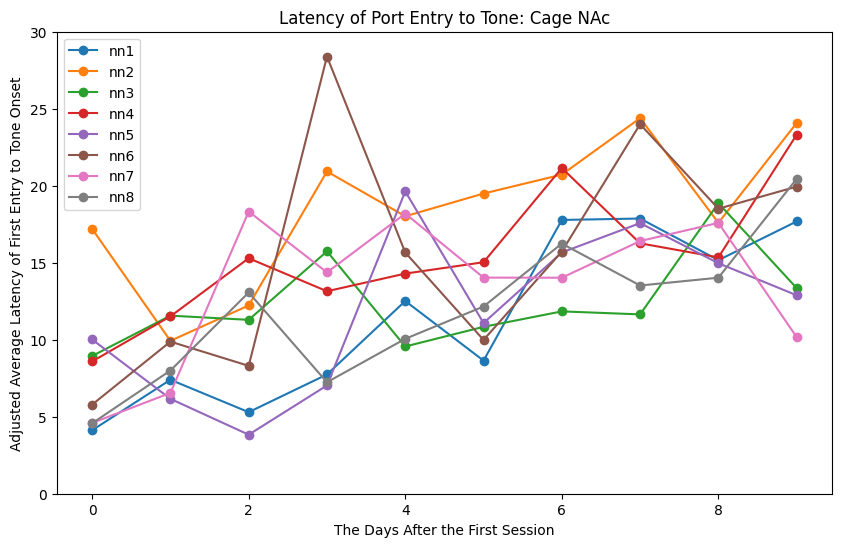

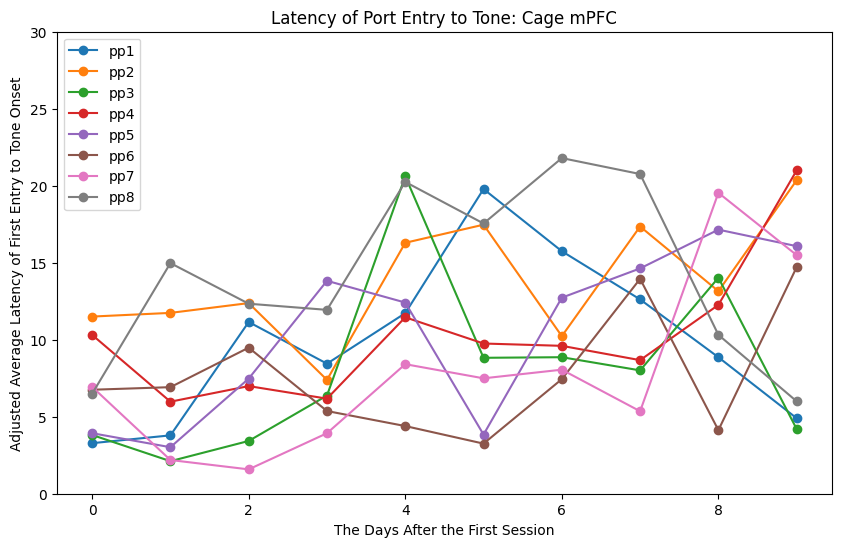

In [79]:
# Plotting for each cage
for cage in grouped_averaged_first_port_df["cage"].unique():
    fig, ax = plt.subplots()
    # Getting all the rows with the current cage number
    cage_df = grouped_averaged_first_port_df[grouped_averaged_first_port_df["cage"] == cage]
    
    # Plotting a line for each subject
    for subject in cage_df["subject"].unique():
        # Getting all the rows with the current subject
        subject_df = cage_df[cage_df["subject"] == subject]
        # Making the dates into days after the first session by subtracting all the dates by the first date
        ax.plot(subject_df["date int"], subject_df["latency_adjusted_greater_than_30"], '-o', label=subject)

    # Setting the Y-Axis to only plot from 0 to 30 because we adjusted the latency to always be under 30
    ax.set_ylim(0, 30)
    # Labeling the X/Y Axis and the title
    ax.set_xlabel("The Days After the First Session")
    ax.set_ylabel("Adjusted Average Latency of First Entry to Tone Onset")
    ax.set_title("Latency of Port Entry to Tone: Cage {}".format(cage))
    # To show the legend
    ax.legend()
    file_name = "average_latency_plot_cage_{}_date_{}_{}.png".format(cage, earliest_date, latest_date)
    plt.savefig(os.path.join(original_average_latency_output_directory, file_name))

## Plotting the original ratio of latencies that are less than 10 seconds

In [80]:
less_than_10_second_original_latency_ratio_plots_output_directory = "./proc/plots"

In [81]:
os.makedirs(less_than_10_second_original_latency_ratio_plots_output_directory, exist_ok=True)

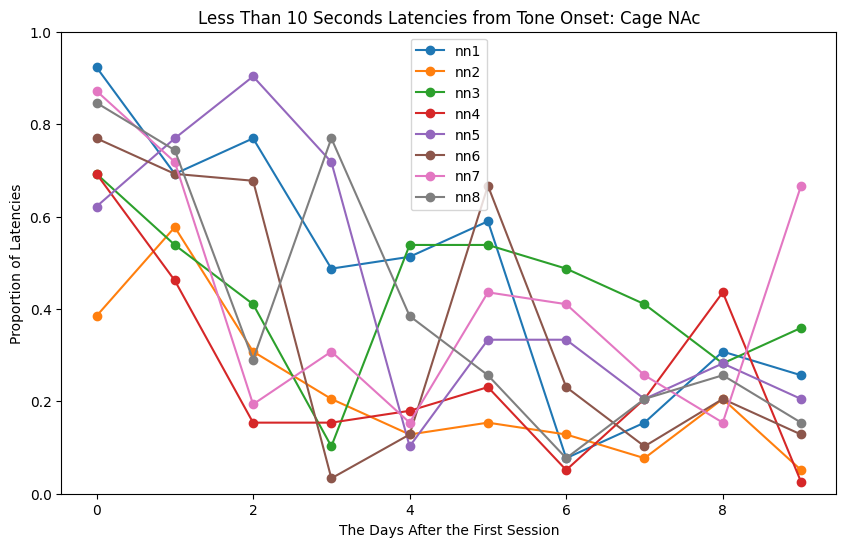

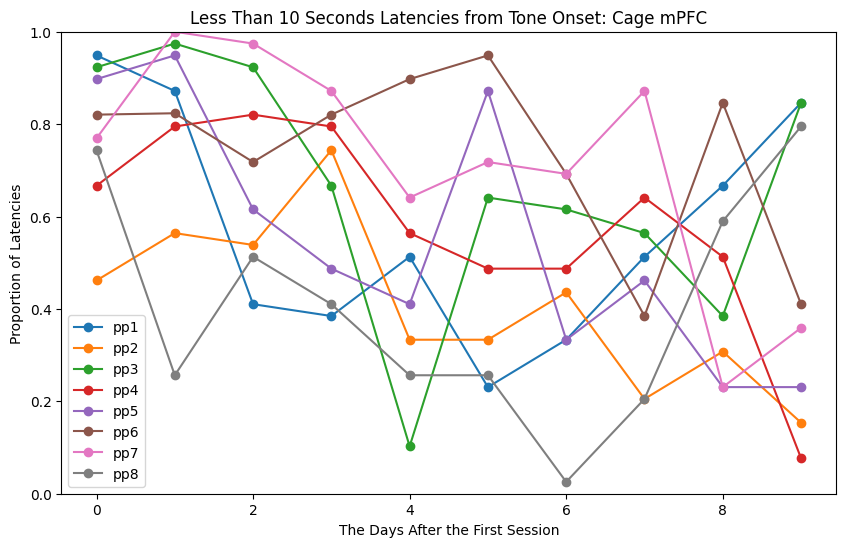

In [82]:
# Plotting for each cage
for cage in grouped_averaged_first_port_df["cage"].unique():
    fig, ax = plt.subplots()
    # Getting all the rows with the current cage number
    cage_df = grouped_averaged_first_port_df[grouped_averaged_first_port_df["cage"] == cage]
    
    # Plotting a line for each subject
    for subject in cage_df["subject"].unique():
        # Getting all the rows with the current subject
        subject_df = cage_df[cage_df["subject"] == subject]
        # Making the dates into days after the first session by subtracting all the dates by the first date
        ax.plot(subject_df["date int"], subject_df["adjusted_30_second_latency_less_than_10_seconds_ratio"], '-o', label=subject)
    # Setting the Y-Axis to only plot from 0 to 30 because we adjusted the latency to always be under 30
    ax.set_ylim(0, 1)
    # Labeling the X/Y Axis and the title
    ax.set_xlabel("The Days After the First Session")
    ax.set_ylabel("Proportion of Latencies")
    ax.set_title("Less Than 10 Seconds Latencies from Tone Onset: Cage {}".format(cage))
    # To show the legend
    ax.legend()
    
    file_name = "10_less_latency_ratio_cage_{}.png".format(cage)
    plt.savefig(os.path.join(less_than_10_second_original_latency_ratio_plots_output_directory, file_name))

## Plotting the Adjusted Latencies for Entries that Overlap with the Tone
Plotting Latencies

In [83]:
overlap_adjusted_average_latency_plots_output_directory = "./proc/plots"

In [84]:
os.makedirs(overlap_adjusted_average_latency_plots_output_directory, exist_ok=True)

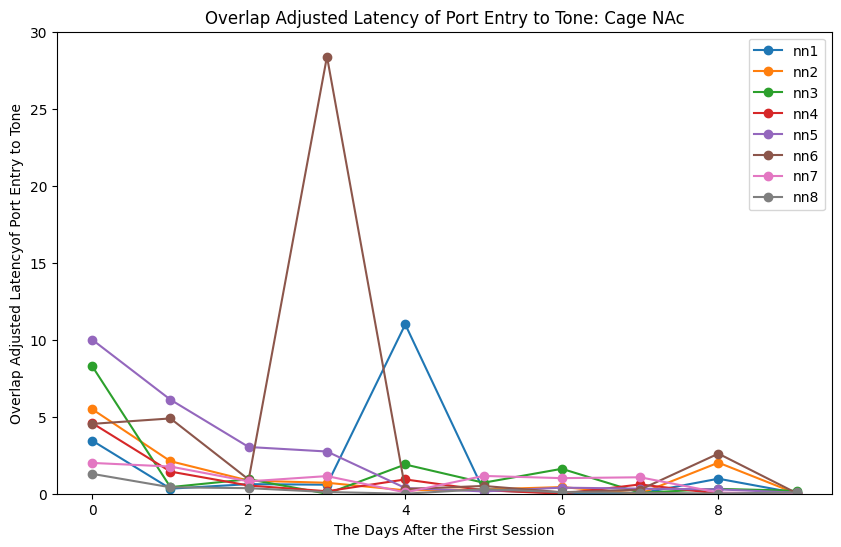

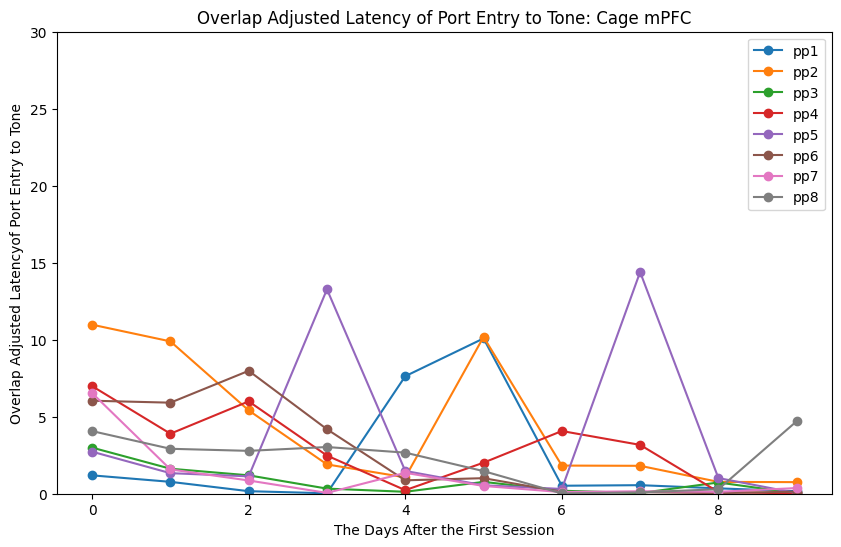

In [85]:
# Plotting for each cage
for cage in grouped_averaged_first_port_df["cage"].unique():
    fig, ax = plt.subplots()
    # Getting all the rows with the current cage number
    cage_df = grouped_averaged_first_port_df[grouped_averaged_first_port_df["cage"] == cage]
    
    # Plotting a line for each subject
    for subject in cage_df["subject"].unique():
        # Getting all the rows with the current subject
        subject_df = cage_df[cage_df["subject"] == subject]
        # Making the dates into days after the first session by subtracting all the dates by the first date
        ax.plot(subject_df["date int"], subject_df["latency_adjusted_overlap"], '-o', label=subject)

    # Setting the Y-Axis to only plot from 0 to 30 because we adjusted the latency to always be under 30
    ax.set_ylim(0, 30)
    # Labeling the X/Y Axis and the title
    ax.set_xlabel("The Days After the First Session")
    ax.set_ylabel("Overlap Adjusted Latencyof Port Entry to Tone")
    ax.set_title("Overlap Adjusted Latency of Port Entry to Tone: Cage {}".format(cage))
    # To show the legend
    ax.legend()
    file_name = "overlap_latency_cage_{}.png".format(cage)

    plt.savefig(os.path.join(overlap_adjusted_average_latency_plots_output_directory, file_name))


## Plotting the ratio of overlap adjusted latencies that are less than 10 seconds

In [86]:
less_than_10_second_overlap_adjusted_latency_ratio_output_directory = "./proc/plots"

In [87]:
os.makedirs(less_than_10_second_overlap_adjusted_latency_ratio_output_directory, exist_ok=True)

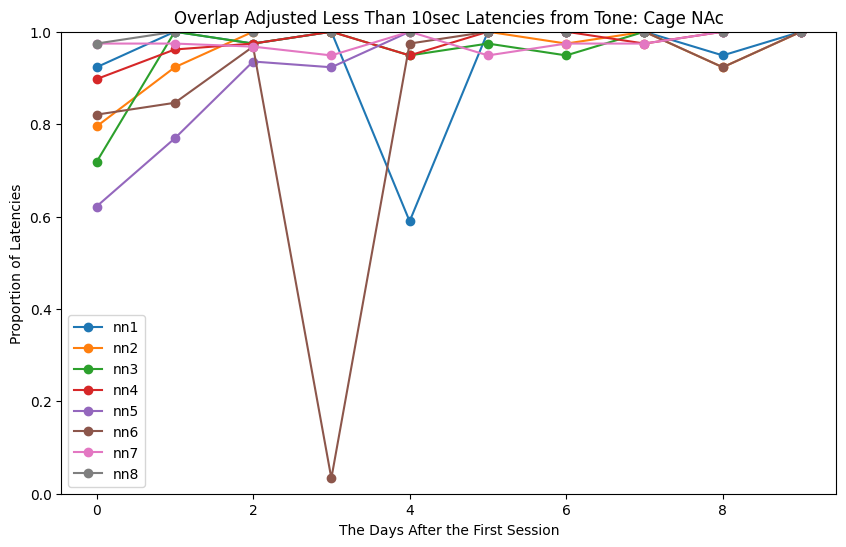

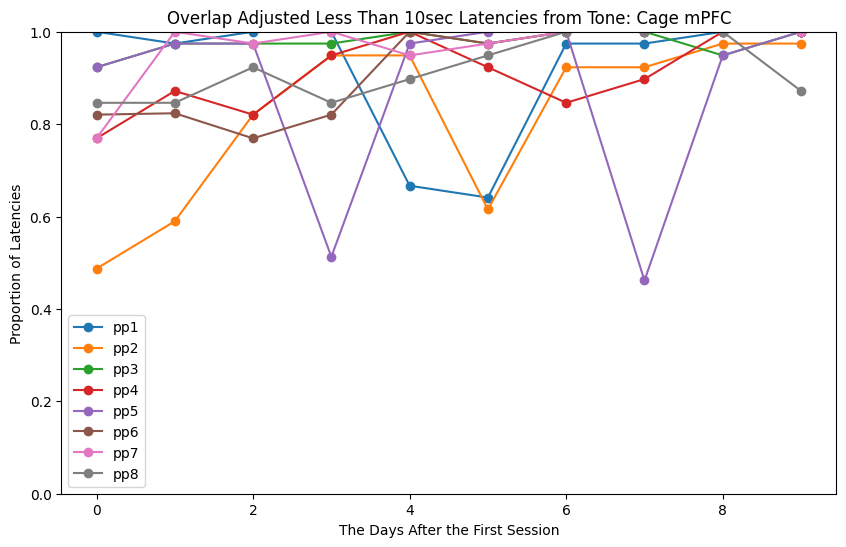

In [88]:
# Plotting for each cage
for cage in grouped_averaged_first_port_df["cage"].unique():
    fig, ax = plt.subplots()
    # Getting all the rows with the current cage number
    cage_df = grouped_averaged_first_port_df[grouped_averaged_first_port_df["cage"] == cage]
    
    # Plotting a line for each subject
    for subject in cage_df["subject"].unique():
        # Getting all the rows with the current subject
        subject_df = cage_df[cage_df["subject"] == subject]
        # Making the dates into days after the first session by subtracting all the dates by the first date
        ax.plot(subject_df["date int"], subject_df["overlap_adjusted_latency_less_than_10_seconds"], '-o', label=subject)

    # Setting the Y-Axis to only plot from 0 to 30 because we adjusted the latency to always be under 30
    ax.set_ylim(0, 1)
    # Labeling the X/Y Axis and the title
    ax.set_xlabel("The Days After the First Session")
    ax.set_ylabel("Proportion of Latencies")
    ax.set_title("Overlap Adjusted Less Than 10sec Latencies from Tone: Cage {}".format(cage))
    # To show the legend
    ax.legend()
    
    file_name = "10_less_overlap_latency_cage{}.png".format(cage)
    plt.savefig(os.path.join(less_than_10_second_overlap_adjusted_latency_ratio_output_directory, file_name))


## SYNCING WITH VIDEO 

Get MED-PC Recording files
- Gets all files ending in .txt 

In [89]:
# VideoFileClip??

## NOTE: The following path must be changed to the directory where your MED-PC recording files are located, if they are not in the specified folder

In [90]:
all_med_pc_file = glob.glob("./data/**/*.txt", recursive=True)

- Use this instead if you're using you're own data
- Extracts the first 10 lines 

In [91]:
all_med_pc_file = glob.glob("./data/clock_recording/*.txt")
all_med_pc_file[:10]

[]

We will just find all the lines that start with "File", "Start Date", "End Date", "Subject", "Experiment", "Group", "Box", "Start Time", "End Time", or "MSN". And then stop once all the metadata types have been collected

In [92]:
# This makes a nested dictionary of file paths to each individual metadata type
file_path_to_meta_data = extract.metadata.get_all_med_pc_meta_data_from_files(list_of_files=all_med_pc_file)

In [93]:
for key, value in file_path_to_meta_data.items():
    print("File path: {}".format(key))
    print("Metadata types and associated values: {}".format(value))
    break

## Making a Dataframe out of the Metadata

In [94]:
# Turning the dictionary into a Pandas Dataframe
metadata_df = pd.DataFrame.from_dict(file_path_to_meta_data, orient="index")
# Resetting the index because currently the file path is the index 
metadata_df = metadata_df.reset_index()

## Inputting all the MED-PC log files

- Example of what the MED-PC Script looks like that was ran when recording the behaviors

In [95]:
# with open("./scripts/levelNP_CS_reward_laserepochON1st_noshock.MPC") as f:
#    lines = f.readlines()
#    for line in lines[:100]:
#        print(line)

- We will be using the comments in the MED-PC script(which starts with the `\`) to create a name for the variables. By default, MED-PC uses a single letter as the name of the variable.
    - This will use the medpc2excel library found in https://github.com/cyf203/medpc2excel
- Example of the comments in the MED-PC script that we will use the names from:
- ```
\Variables

\A - Time since last CS

\B - Shock intensity

\C - Counter array

\D - Current ITI value

\E - CS ITI values for first few trials

\F - Shock duration

\G -

\H -

\I -

\J - Shock intensity repo

\K - CS type

\L -

\M - CS type repo

\N - Port exit time stamp array

\O -

\P - Port entry time stamp array

\Q - Sucrose delivery time stamp array (absolute)

\R - Sucrose delivery time stamp array (relative to last CS)

\S - CS presentation time stamp array

\T - Session timer

\U - Time since last CS presentation

\V - List of CS ITI values (tone + houselight)

\W - ITI values used for CS one each trial

\X -

\Y - Beam break monitor variable

\Z -

In [96]:
all_med_pc_file = os.listdir(current_working_directory)
all_med_pc_file = [os.path.join(current_working_directory, file) for file in all_med_pc_file]

with open(all_med_pc_file[0]) as f:
        lines = f.readlines()
        for line in lines[:20]:
            print(line)


File: C:\MED-PC\Data\2025-01-24_08h28m_Subject nn1.txt







Start Date: 01/24/25

End Date: 01/24/25

Subject: nn1

Experiment: FP_C3_RT_Day1

Group: NAc

Box: 3

Start Time: 08:28:46

End Time: 09:36:07

MSN: C57_reward_training

A:    4399.000

D:    9000.000

E:       0.000

L:       0.000

M:       0.000

O:       0.000

T:    3660.000



- Please make sure that the corresponding .mpc file (aka the MED-PC script) that was ran to create the log file

In [97]:
concatted_medpc_df = extract.dataframe.get_medpc_dataframe_from_list_of_files(medpc_files=all_med_pc_file)
concatted_medpc_df = concatted_medpc_df.reset_index(drop=True)

C:\Users\yezon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\medpc2excel\medpc_read.py:81: SyntaxWarning: invalid escape sequence '\s'
  name = re.sub('[\s]*', '', name)
C:\Users\yezon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\medpc2excel\medpc_read.py:94: SyntaxWarning: invalid escape sequence '\w'
  varnameLists =  [line for line in variables if not re.search('\w:\s+', line) and line != '']
C:\Users\yezon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\medpc2excel\medpc_read.py:114: SyntaxWarning: invalid escape sequence '\s'
  temp += re.split('\s+',d.split(':')[1])


KeyboardInterrupt: 

- Drops rows that don't have CS presentation time

In [98]:
cs_time_df = concatted_medpc_df[concatted_medpc_df["(F)port_entry_minutescomputer"] != 0.0].dropna(subset="(F)port_entry_minutescomputer")

In [99]:
cs_time_df["file_path"].unique()

array(['C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_08h28m_Subject nn1.txt',
       'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_08h28m_Subject nn2.txt',
       'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_09h48m_Subject nn3.txt',
       'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_09h48m_Subject nn4.txt',
       'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_11h36m_Subject pp1.txt',
       'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3_Data\\2025-01-24_11h36m_Subject pp2.txt',
       'C:\\\\Users\\\\yezon\\\\Padilla-Coreano_Lab\\\\Albert Cohort 3\\\\MED_PC_code\\\\MED-PC\\\\FP_P2C3

## Making a column for the Controll Stimulus time
- If you would like to see all the column labels you can use .columns

- Making the numbers for hours, minutes, and seconds into whole numbers for columns G, H, I

In [100]:
cs_time_df["cs_second"] = cs_time_df["(G)controlled_stimulus_secondscomputer"].astype(int).astype(str)
cs_time_df["cs_minute"] = cs_time_df["(H)controlled_stimulus_minutescomputer"].astype(int).astype(str)
cs_time_df["cs_hour"] = cs_time_df["(I)controlled_stimulus_hourscomputer"].astype(int).astype(str)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

- Combining the hours, minutes, and seconds into one column as a string

In [ ]:
cs_time_df["cs_time_str"] = cs_time_df.apply(lambda x: ":".join([x["cs_hour"], x["cs_minute"],  x["cs_second"]]), axis=1)

- Converting the time into a Python datetime object
- This will allow us to make calculations

In [ ]:
cs_time_df["cs_time_object"] = cs_time_df["cs_time_str"].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))
cs_time_df

## Making a column for the Port Entry time

- Making the numbers for hours, minutes, and seconds into whole numbers for columns B, F, J

In [ ]:
cs_time_df["pe_second"] = cs_time_df["(B)port_entry_secondscomputer"].astype(int).astype(str)
cs_time_df["pe_minute"] = cs_time_df["(F)port_entry_minutescomputer"].astype(int).astype(str)
cs_time_df["pe_hour"] = cs_time_df["(J)port_entry_hourscomputer"].astype(int).astype(str)

- Combining the hours, minutes, and seconds into one column as a string

In [ ]:
cs_time_df["pe_time_str"] = cs_time_df.apply(lambda x: ":".join([x["pe_hour"], x["pe_minute"],  x["pe_second"]]), axis=1)

Converting the time into a Python datetime object
This will allow us to make calculations

In [ ]:
cs_time_df["pe_time_object"] = cs_time_df["pe_time_str"].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))
cs_time_df

## Importing Video Data
- These CSVs are create in Bonsai when the video is being recorded. They give a time stamp of when the video is first being recorded.

In [ ]:
video_recording_time_stamps = pd.read_csv("./data/automatic_30_min_end_test/clock_test_time_2022-07-13T20_02_37.csv", header=None)

The video is first being recorded in the time specified by the cell in the first row and the first column
- We will try to get on the hour, minute, seconds from this
- By getting everthing after the space, and then removing everything before the period

In [ ]:
video_recording_time_stamps["time"] = video_recording_time_stamps[1].apply(lambda x: x.split()[-1].split(".")[0])

In [ ]:
video_recording_start_time_str = video_recording_time_stamps["time"][0]
video_recording_start_time_str

- Converting this into a datetime object so that we can make calculations

In [ ]:
video_recording_start_time_object = datetime.strptime(video_recording_start_time_str, '%H:%M:%S')
video_recording_start_time_object

## Syncing MED-PC timestamps with video 
- To get when in the video something happens(i.e. 10 seconds), we will calculate the difference of the time of the event with the time that the video first starts being recorded
- NOTE: Make sure that you are using the associated files for the MED-PC recording file and the video file

In [ ]:
first_medpc_recording_file = cs_time_df["file_path"].unique()[0]

first_cs_time_df = cs_time_df[cs_time_df["file_path"] == first_medpc_recording_file]

In [ ]:
# The time of the first controlled stimulus 
first_cs_time_df["cs_time_object"].iloc[0]
# The time of the second controlled stiumuls
first_cs_time_df["cs_time_object"].iloc[1]

- Subtracts the first, second, and third stimuli from the start of the video time to find the amount of seconds for each one
- If you want to view second difference use .seconds 

In [ ]:
# The time in the video that the controlled stimulus occurs
cs_01_time_object = first_cs_time_df["cs_time_object"].iloc[0] - video_recording_start_time_object 
cs_02_time_object = first_cs_time_df["cs_time_object"].iloc[1] - video_recording_start_time_object 
cs_03_time_object = first_cs_time_df["cs_time_object"].iloc[2] - video_recording_start_time_object 

## Syncing the MED-PC Port Entries with the time in the video
- To get when in the video something happens(i.e. 10 seconds), we will calculate the difference of the time of the event with the time that the video first starts being recorded
- NOTE: Make sure that you are using the associated files for the MED-PC recording file and the video file

In [ ]:
# The time in the video that the controlled stimulus occurs
port_entry_01_time_object = first_cs_time_df["pe_time_object"].iloc[0] - video_recording_start_time_object 
port_entry_02_time_object = first_cs_time_df["pe_time_object"].iloc[5] - video_recording_start_time_object 
port_entry_03_time_object = first_cs_time_df["pe_time_object"].iloc[8] - video_recording_start_time_object 

In [ ]:
first_cs_time_df["pe_time_object"].iloc[8]

## Trimming Video 

In [ ]:
video_object = VideoFileClip("./data/automatic_30_min_end_test/2clock_test_recording_2022-07-13T20_02_39.avi")
video_object.duration

- Trims video for each incident 

In [ ]:
cs1_trimmed_video = video_object.subclip(cs_01_time_object.seconds, cs_02_time_object.seconds + 20)
cs2_trimmed_video = video_object.subclip(cs_02_time_object.seconds, cs_03_time_object.seconds + 20)
cs3_trimmed_video = video_object.subclip(cs_03_time_object.seconds, video_object.duration)

- Writes video clips to file 

In [ ]:
cs1_trimmed_video.to_videofile("./data/automatic_30_min_end_test/trimmed_cs1.mp4")
cs2_trimmed_video.to_videofile("./data/automatic_30_min_end_test/trimmed_cs2.mp4")
cs3_trimmed_video.to_videofile("./data/automatic_30_min_end_test//trimmed_cs3.mp4")

- Trims video for port entries 

In [ ]:
pe1_trimmed_video = video_object.subclip(port_entry_01_time_object.seconds, port_entry_02_time_object.seconds + 20)
pe2_trimmed_video = video_object.subclip(port_entry_02_time_object.seconds, port_entry_03_time_object.seconds + 20)
pe3_trimmed_video = video_object.subclip(port_entry_03_time_object.seconds, video_object.duration)

- Writes video clips to file for port entries

In [ ]:
pe1_trimmed_video.to_videofile("./data/automatic_30_min_end_test/trimmed_pe1.mp4")
pe2_trimmed_video.to_videofile("./data/automatic_30_min_end_test/trimmed_pe2.mp4")
pe3_trimmed_video.to_videofile("./data/automatic_30_min_end_test//trimmed_pe3.mp4")

In [ ]:
Video("./data/automatic_30_min_end_test/trimmed_cs1.mp4")